# Import des librairies et des fonctions de traitement des images

In [31]:
from PIL import Image 
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

import os
import cv2
import random
import time
import datetime

In [32]:
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (255, 255))  # Assurez-vous que la taille correspond à celle utilisée lors de l'entraînement
    img = img / 255.0  # Normalisez les valeurs des pixels
    img = np.expand_dims(img, axis=0)  # Ajoutez une dimension pour représenter le lot (batch)

    return img

In [33]:
def load_data_multi_class(dataset_path):
    data = []
    labels = []

    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)
        if os.path.isdir(folder_path):

            label = folder.lower()  # Utilisez le nom du dossier comme label
            print(label)
            for filename in os.listdir(folder_path):
                img_path = os.path.join(folder_path, filename)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (255, 255))
                data.append(img)
                labels.append(label)

    data = np.array(data) / 255.0
    labels = np.array(labels)

    return data, labels

# On charge notre modèle

In [34]:
from keras.models import load_model
#model.save('models/88-83.h5')

model = load_model('models/88-83.h5')
#model.summary()

# Evaluation des performances

## fonctions

In [35]:
def predict_defect_multi_class(model, image_path):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    #print (model.predict(preprocessed_img))

    # Interprétez les prédictions
    class_labels = [ 'OK','bed_not_stick', 'spaghetti']
    predicted_class = class_labels[np.argmax(predictions)]

    return predicted_class

In [36]:
def predict(dir):
    resultf=""
    nb_total=0
    nb_positif=0
    for filename in os.listdir(dir):
        #print(filename)
        nb_total+=1

        result = predict_defect_multi_class(model, dir +"/" + filename)
        if result.upper()==dir[4:].upper():
            nb_positif+=1

        resultf= resultf + "prédiction pour"+ filename + " : "+ str(result) +"\n"

    print (resultf)
    print(str((nb_positif*100)/nb_total) + " % de précision")


## résultats

On teste notre modèle sur 16 images sélectionnées de chaques catégories qui ne sont pas dans le dataset de train.

In [37]:
predict("testok")

1/1 [==============================] - 0s 238ms/step


1/1 [==============================] - 0s 84ms/step
prédiction pourok.jpg : OK
prédiction pourok3.jpg : OK
prédiction pourok5.png : spaghetti
prédiction pourspaghetti.jpg : OK
prédiction pourWIN_20231010_15_02_24_Pro.jpg : OK
prédiction pourWIN_20231010_15_02_40_Pro.jpg : OK
prédiction pourWIN_20231010_15_03_00_Pro.jpg : OK
prédiction pourWIN_20231010_15_03_09_Pro.jpg : OK
prédiction pourWIN_20231010_15_03_11_Pro.jpg : OK
prédiction pourWIN_20231010_15_03_18_Pro.jpg : OK
prédiction pourWIN_20231010_15_03_24_Pro.jpg : OK
prédiction pourWIN_20231010_15_03_29_Pro.jpg : OK
prédiction pourWIN_20231010_15_03_56_Pro.jpg : OK
prédiction pourWIN_20231010_15_03_58_Pro.jpg : OK
prédiction pourWIN_20231010_15_04_02_Pro.jpg : OK
prédiction pourWIN_20231010_15_04_05_Pro.jpg : OK

93.75 % de précision


In [38]:
predict("testbed_not_stick")

1/1 [==============================] - 0s 93ms/step
prédiction pourmirror_20231020_154642.jpg : bed_not_stick
prédiction pourmirror_20231020_154647.jpg : OK
prédiction pourmirror_20231020_154657.jpg : bed_not_stick
prédiction pourmirror_20231023_113042.jpg : OK
prédiction pourmirror_20231023_113059.jpg : bed_not_stick
prédiction pourmirror_20231023_113114.jpg : OK
prédiction pourmirror_20231024_145033.jpg : OK
prédiction pourmirror_20231024_145036.jpg : spaghetti
prédiction pourmirror_20231024_145045.jpg : OK
prédiction pourmirror_20231024_145048.jpg : OK
prédiction pourmirror_20231024_145054.jpg : OK
prédiction pourmirror_IMG_20231017_174752.jpg : OK
prédiction pourmirror_IMG_20231024_145904.jpg : OK
prédiction pourmirror_IMG_20231024_145911.jpg : OK
prédiction pourmirror_Screenshot_3.jpg : OK
prédiction pourmirror_Screenshot_4.jpg : OK

18.75 % de précision


On remarque des performances bien plus basses pour le défaut "bed not stick", cependant celui ci est difficile à décerner visuellement et entraine rapidement la création de spaguettis qui sont eux bien détectés par notre modèle.

In [39]:
predict("testspaghetti")

1/1 [==============================] - 0s 95ms/step
prédiction pour149918_fea6b7ad1f911b19fff8646791e3edc9.jpg : OK
prédiction pour336642593_1586539821825588_2902609152199909802_n_cropped_jpg.rf.2d5aa60a4ff666f611bf9e13600b2c90.jpg : spaghetti
prédiction pourcb7afa69396b8da7b092bcea0337193654a8ae99e3597e58851c8ba742c716e7_1.jpg : spaghetti
prédiction pourDv-Hh80U0AABjlw_jpg.rf.6116d29abb60be092c1930f2765318db.jpg : spaghetti
prédiction pourfailedprint2_img_5eb0af2d67ead.jpg : spaghetti
prédiction pourimag-12-_jpg.rf.30b4d2d01cbe881c76ffb7cd4aa30d4c.jpg : spaghetti
prédiction pourimag-61-_jpg.rf.b10e3a7fad549280a1a405c80d0c800d.jpg : spaghetti
prédiction pourimag-90-_jpg.rf.4b9eacbcb46c3c32db58fb5f7c22ed4c.jpg : spaghetti
prédiction pourspaghetti_11_jpg.rf.8f8ab1a10807e3e51c4075a1a018ce3b.jpg : spaghetti
prédiction pourspaghetti_1_jpg.rf.4b6bc66a3d72ead9fc1592820c153ee8.jpg : spaghetti
prédiction pourspaghetti_49_jpg.rf.2f51e66161f920f5704ae3e81e089435.jpg : spaghetti
prédiction pourspa

# Test avec de nouvelles images aléatoires

In [40]:
def vignette_random(dir):
  L=[]
  for filename in os.listdir(dir):
    L.append(filename)
  file_alea = L[random.randint(0, (len(L)-1))]
  image_path = dir +"/" + file_alea
  result = predict_defect_multi_class(model, image_path)
  img = Image.open(image_path)
  plt.imshow(img)
  plt.axis('off')  # Masquer les axes
  plt.show()

  print (result)

1/1 [==============================] - 0s 101ms/step


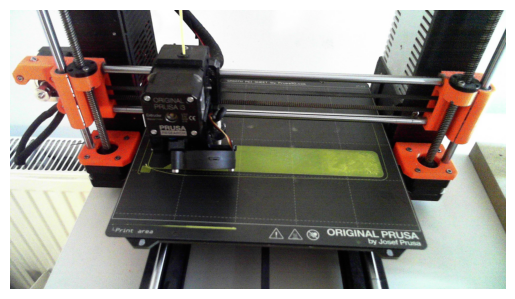

OK


In [41]:
vignette_random("testok")

1/1 [==============================] - 0s 64ms/step


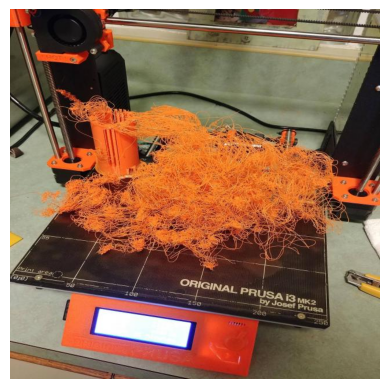

spaghetti


In [51]:
vignette_random("testspaghetti")

1/1 [==============================] - 0s 60ms/step


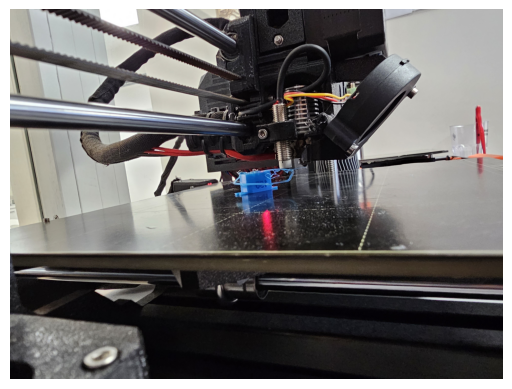

bed_not_stick


In [53]:
vignette_random("testbed_not_stick")

# Prédiction à partir de captures vidéos en direct

On prend une photo avec une webcam USB et on process la capture pour faire de la détéction de défaut avec notre modèle

## Fonctions

In [44]:
def capture():
  # Ouvrir la webcam (la webcam par défaut a l'ID 0)
  cap = cv2.VideoCapture(1)

  # Vérifier si la webcam est ouverte correctement
  if not cap.isOpened():
      print("Erreur: Impossible d'ouvrir la webcam.")
      exit()

  # Capturer une image
  time.sleep(0.5)
  ret, frame = cap.read()

  # Sauvegarder l'image capturée
  if ret:
      cv2.imwrite("photo_capturee.jpg", frame)
      print("Photo capturée avec succès.")

      result = predict_defect_multi_class(model, 'photo_capturee.jpg')
      img = Image.open('photo_capturee.jpg')
      plt.imshow(img)
      plt.axis('off')  # Masquer les axes
      now = datetime.datetime.now().strftime("%H:%M:%S")
      

      plt.show()
      print(f"Prédiction pour la capture caméra : {result}")
      print(f"à {now}")
  
  
  else:
      print("Erreur lors de la capture de la photo.")

  # Libérer la webcam
  cap.release()



In [54]:
def capture_boucle():
    try:
        while True:
            # Exécute la fonction capture()
            capture()
            print()

            
            # Pause de x secondes
            time.sleep(0.5)

    except KeyboardInterrupt:
        print("\nInterruption de l'utilisateur. Fin du script.")

## Démo

Photo capturée avec succès.
1/1 [==============================] - 0s 98ms/step


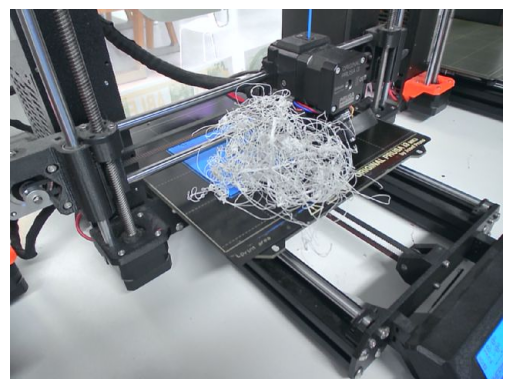

Prédiction pour la capture caméra : spaghetti
à 16:58:56


In [49]:
capture()

Photo capturée avec succès.
1/1 [==============================] - 0s 85ms/step


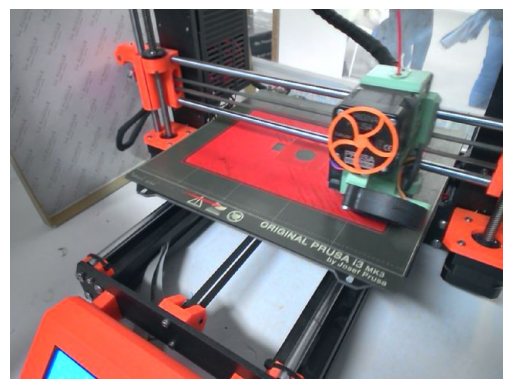

Prédiction pour la capture caméra : OK
à 16:57:55

Photo capturée avec succès.
1/1 [==============================] - 0s 103ms/step


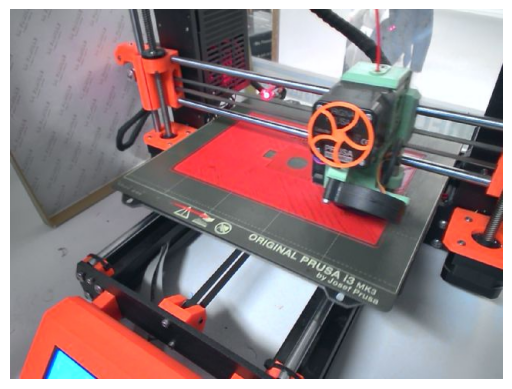

Prédiction pour la capture caméra : OK
à 16:58:02

Photo capturée avec succès.
1/1 [==============================] - 0s 96ms/step


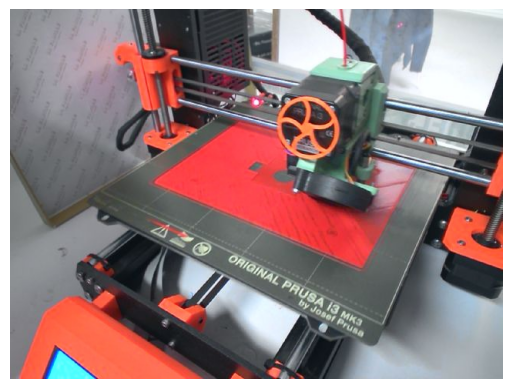

Prédiction pour la capture caméra : OK
à 16:58:09

Photo capturée avec succès.
1/1 [==============================] - 0s 129ms/step


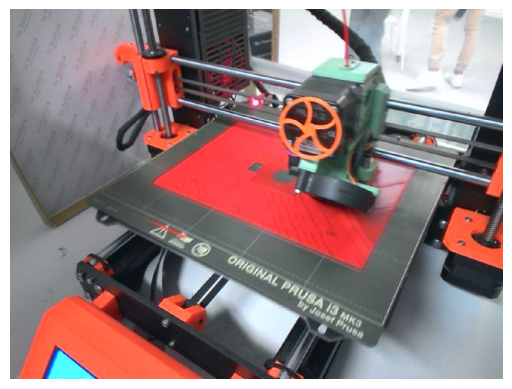

Prédiction pour la capture caméra : OK
à 16:58:15

Photo capturée avec succès.
1/1 [==============================] - 0s 99ms/step


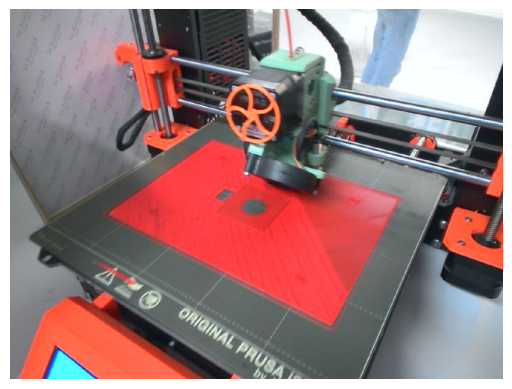

Prédiction pour la capture caméra : OK
à 16:58:22


Interruption de l'utilisateur. Fin du script.


In [47]:
capture_boucle()